<a href="https://colab.research.google.com/github/vngeno/DATA-ANALYSIS-OF-OWNERSHIP-OF-BANK-ACCOUNTS-IN-EAST-AFRICAN-COUNTRIES/blob/main/EXPLORATORY_DATA_ANALYSIS_OF_OWNERSHIP_OF_BANK_ACCOUNTS_IN_EAST_AFRICAN_COUNTRIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Define the Question


**Which individuals are most likely to have or use a bank account?**

#Metric of Success

To identify individuals that are most likely to have a or use a bank account

#Understanding the Context

Pivotal role of traditional banking in the wake of mobile money in Africa and growth of innovative fintech solutions.

#Recording the Experimental Design

We're going to clean and tidy up our data, and in the analysis use statistical methods such as finding measures of central tendency and visualization techniques to come up with a relevant conlusion

#Data Relevance

The importance of this data will enable us to determine the uptake of bank accounts by basis of need and provide insights into some of the key demographic factors that might drive individuals’ financial outcomes.

#Reading the Data

In [1]:
#importing the libraries needed for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading The Dataset
#Dataset: http://bit.ly/FinancialDataset
df_fin = pd.read_csv('http://bit.ly/FinancialDataset')
df_fin

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [3]:
#Loading the variables definitions
df_def = pd.read_csv('http://bit.ly/VariableDefinitions')
df_def


,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [4]:
#Determining no. of records in our dataset
df_fin.shape

(23524, 13)

In [5]:
#Previewing the top of oue dataset
df_fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
#Previewing the bottom of our dataset
df_fin.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
#Checking appropriate data types in each column
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [8]:
df_fin.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [9]:
#checking the column names
df_fin.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

#Tidying the Dataset

##Handling missing values

In [10]:
#Checking for missing values
df_fin.isnull().sum()


country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [11]:
df_fin.corr()

,year,household_size,Respondent Age
year,1.000000,-0.049344,-0.019570
household_size,-0.049344,1.000000,-0.119709
Respondent Age,-0.019570,-0.119709,1.000000


There are a few missing values hence we can drop the values.


In [12]:
#Dropping the missing values
df_fin.dropna(inplace=True)
df_fin.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

##Handling duplicate records

In [13]:
#Checking for duplicate records
df_fin.duplicated().sum()

0

There are no duplicate records. Hence we can proceed.


##Handling Outliers

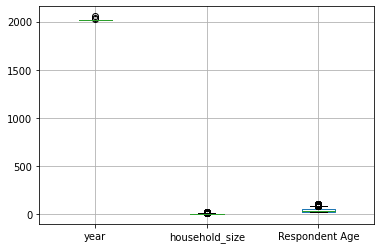

In [14]:
#We first check for outliers using the boxplot method
df_fin.boxplot()

In [15]:
#We can now see that outliers exist in the year, household_size and Respondent age columns.
#We will now remove the outliers in order to get accurate results during analysis.
col_names=['household_size','Respondent Age','year']
num_col = df_fin[col_names]
Q1 = num_col.quantile(0.25)
Q3 = num_col.quantile(0.75)
IQR = Q3 -Q1


df_out = df_fin[~((df_fin < (Q1 - 1.5 * IQR)) |(df_fin > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)


(22725, 13)


In [16]:
df_out.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


We have now successfully removed outliers from the columns


#THE ANALYSIS

##UNIVARIATE ANALYSIS

Visualization of the type of job of the respondents

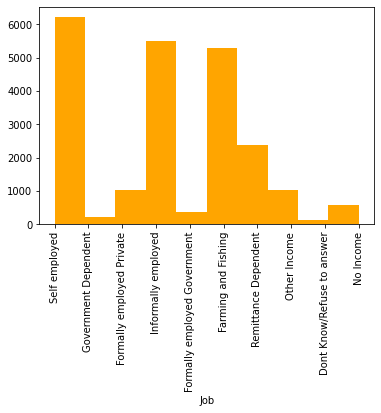

In [17]:
#Histogram
plt.hist(df_out['Type of Job'], color = 'orange')
plt.xlabel('Job')
plt.xticks(rotation=90);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


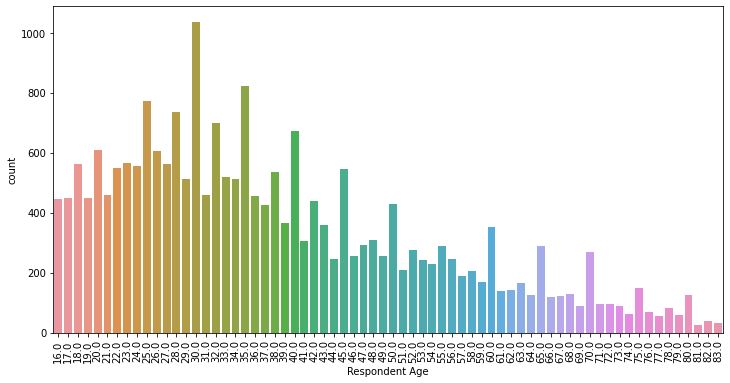

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(df_out['Respondent Age'])
plt.xticks(rotation=90);

In [19]:
#Finding measures of central tendency
df_out.describe()

,year,household_size,Respondent Age
count,22725.000000,22725.000000,22725.000000
mean,2016.968185,3.579846,38.347987
std,0.846366,2.080542,15.806141
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,9.000000,83.000000


##Bivariate Analysis

Checking the column names

In [20]:
df_out.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

What is the relationship of the variables to each other?

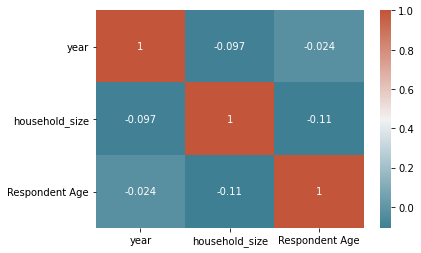

In [21]:
#Finding the Correlation between variables
corr = df_out.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Number of respondents in the four countries with and without bank accounts

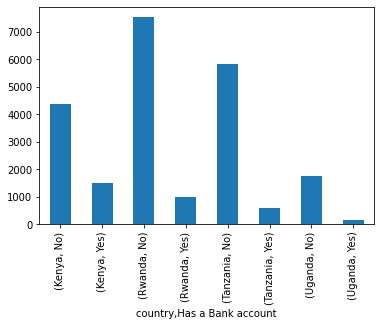

In [22]:
df_out.groupby('country')['Has a Bank account'].value_counts().plot.bar()

Visualization of respondents in rural and urban areas with or without bank accounts

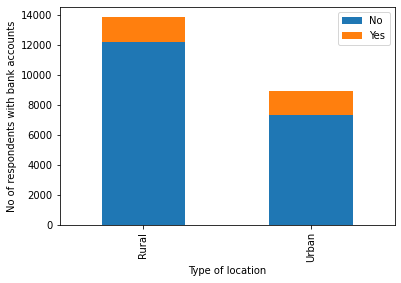

In [23]:
#Stacked column showing number of respondents with bank accounts in rural and urban areas
df_out.groupby('Type of Location')['Has a Bank account'].value_counts().unstack().plot.bar(stacked=True)
plt.legend(loc="upper right")
plt.ylabel('No of respondents with bank accounts')
plt.xlabel('Type of location')
plt.show()

Gender of respondents with or without bank accounts

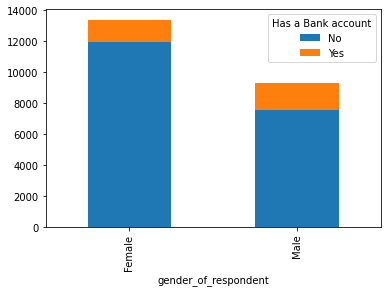

In [24]:
df_out.groupby('gender_of_respondent')['Has a Bank account'].value_counts().unstack().plot.bar(stacked=True);

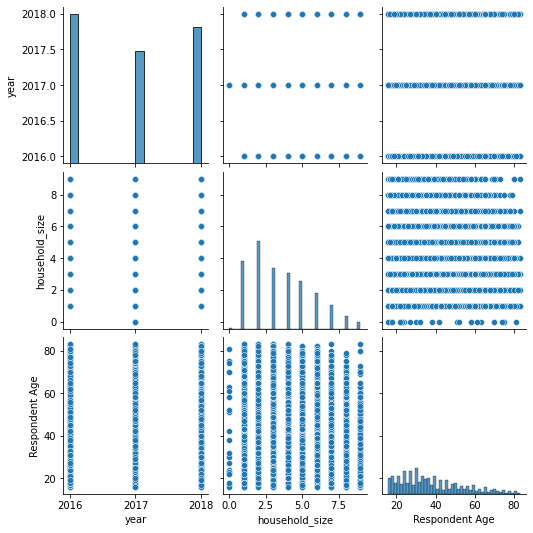

In [25]:
sns.pairplot(df_out)

#Multivariate Analysis

To perform multivariate analysis, we'll have to convert the columns to numericals first.

In [26]:
new_df=pd.get_dummies(df_out[["Type of Location","Has a Bank account","Cell Phone Access","gender_of_respondent"]],
                      columns=["Type of Location","Has a Bank account","Cell Phone Access","gender_of_respondent"],
                      prefix=["location","banked","cellphone","gender"],drop_first=True).head()
                    

In [27]:
new_df.head()

,location_Urban,banked_Yes,cellphone_Yes,gender_Male
0,0,1,1,0
1,0,0,0,0
2,1,1,1,1
3,0,0,1,0
4,1,0,0,1


In [28]:
new_df.shape

(5, 4)

In [29]:
new_df.isnull().sum()

location_Urban    0
banked_Yes        0
cellphone_Yes     0
gender_Male       0
dtype: int64

##Discriminant Analysis

In [30]:
X = new_df.iloc[:, 0:3].values
y = new_df.iloc[:, 3].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[0 0]
 [1 0]]
Accuracy0.0


##Principle Component Analysis

In [36]:
new_df['country'] = df_fin["country"]

In [37]:
X = new_df.drop('country', 1)
y = new_df['country']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [41]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.84848892e-01, 2.25027991e-01, 9.01231167e-02, 1.41555851e-34])

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
#Predicting the results
y_pred = classifier.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[1]]
Accuracy 1.0


This shows the data is 100% accurate

##Implementing the Solution

From our analysis, we've seen that men the majority bank account holders. Persons of the age 29 years are also majority bank account holders.
Most respondents with no bank accounts come from Rwanda, followed by Tanzania, Kenya Then Uganda. 

Majority of respondents with bank accounts are self employed while the least have no income.

##Challenging the Solution

Additionaly, to challenge the conclusion made above, countries like Kenya and Uganda which have fewer bank account holders could signify penetration of mobile banking which is being used an effecient and cost effective alternative to owning bank accounts.

The few bank account holders in the rural locations could be because of inaccessibility to the banks or lack of penetration of the banks in the rural areas.

##Follow Up Questions

Why are there fewer females with bank accounts?

Why is Uganda the country with least people with Bank accounts?

Why are there few people with bank accounts whose income status is 'Government Dependent'?
